In [1]:
#This project is based on guided project from youtube.

import pandas as pd
import os 
import string 
import matplotlib.pyplot as plt

Merging all each month data into a new file.

In [2]:
files = [file for file in os.listdir("./Sales_Data") if file.endswith('csv')]

all_months= pd.DataFrame()

for file in files:
    df= pd.read_csv("./Sales_Data/"+file)
    all_months = pd.concat([all_months, df])

all_months.to_csv("all_files.csv", index= False)


Reading the new file with all files.

In [3]:
df= pd.read_csv("all_files.csv")
df.head(2)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"


Cleaning the data: Drop empty rows.

In [4]:
df_nan = df[df.isna().any(axis=1)] #Checking to see if there is any empty rows

df = df.dropna(how='all') #droping all null values

df.isna().values.any() #Checking if df does have any null values.

False

Removing Duplicate headers created when merging the each month files.

In [5]:
df = df[df["Order Date"]!= "Order Date"]

Convert Columns to correct data type.

In [6]:
df["Quantity Ordered"]= pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df["Price Each"])

What was the best month for sales? How much was earned that month?

First, adding month, sales columns to the file.

In [7]:
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype(int)


In [8]:
df['Sales']= df['Quantity Ordered']*df['Price Each']
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95


In [9]:
df_sales = df.groupby("Month").sum().reset_index()
df_sales.head(12)

,Month,Quantity Ordered,Price Each,Sales
0,1,10903,1811768.38,1822256.73
1,2,13449,2188884.72,2202022.42
2,3,17005,2791207.83,2807100.38
3,4,20558,3367671.02,3390670.24
4,5,18667,3135125.13,3152606.75
5,6,15253,2562025.61,2577802.26
6,7,16072,2632539.56,2647775.76
7,8,13448,2230345.42,2244467.88
8,9,13109,2084992.09,2097560.13
9,10,22703,3715554.83,3736726.88


Visualize the sales for each month.

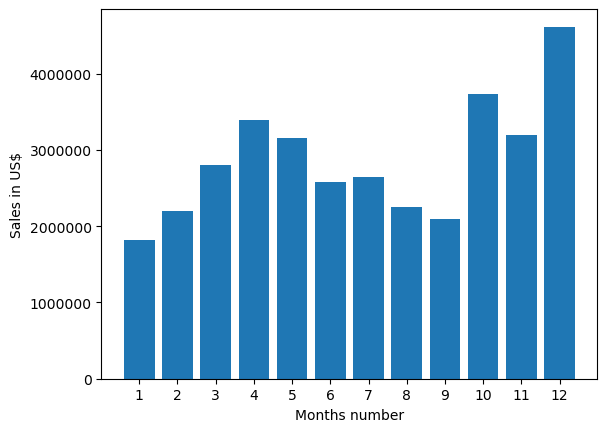

In [10]:
import matplotlib.pyplot as plt

plt.bar("Month", "Sales", data= df_sales)
plt.xticks(df_sales["Month"])
plt.xlabel("Months number")
plt.ylabel("Sales in US$")
plt.ticklabel_format(style= "plain")

plt.show()

What city had the highest number of sales?

First Create a City column.

In [11]:
def city(address):
    return address.split(",")[1]
def state(address):
    return address.split(",")[2].split()[0]

df["City"] = df["Purchase Address"].apply(lambda x:f'{city(x)} ({state(x)})')

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [12]:
df_city = df.groupby("City").sum("Sales").sort_values(by='Sales', ascending= False).reset_index()


df_city

,City,Quantity Ordered,Price Each,Month,Sales
0,San Francisco (CA),50239,8211461.74,315520,8262203.91
1,Los Angeles (CA),33289,5421435.23,208325,5452570.80
2,New York City (NY),27932,4635370.83,175741,4664317.43
3,Boston (MA),22528,3637409.77,141112,3661642.01
4,Atlanta (GA),16602,2779908.20,104794,2795498.58
5,Dallas (TX),16730,2752627.82,104620,2767975.40
6,Seattle (WA),16553,2733296.01,104941,2747755.48
7,Portland (OR),11303,1860558.22,70621,1870732.34
8,Austin (TX),11153,1809873.61,69829,1819581.75
9,Portland (ME),2750,447189.25,17144,449758.27


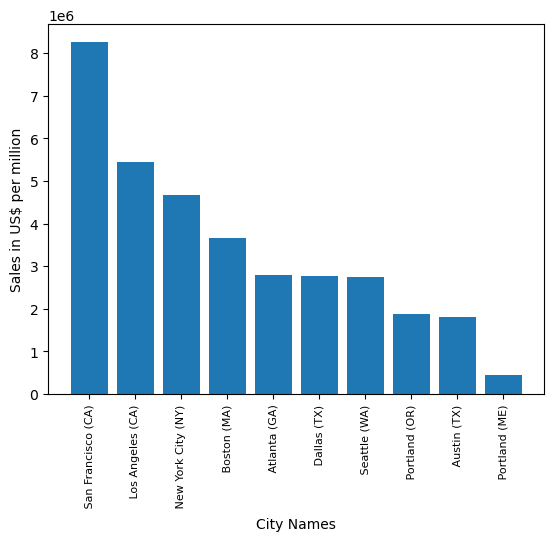

In [13]:

plt.bar('City','Sales', data= df_city)
plt.xticks(df_city["City"], rotation= 90, size= 8)
plt.xlabel("City Names")
plt.ylabel("Sales in US$ per million")
plt.show()

Question: What time should we display advertisemebts to maximize likelihood of customer's buying product?

In [14]:
#Converts the Order date to datetime format.
df["Order Date"] = pd.to_datetime(df['Order Date'])
df["Hour"]= df["Order Date"].dt.hour
df["Count"] = 1  #Creating a counter column.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Count
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,1
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,1
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,1
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,1
...,...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston (MA),19,1
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City (NY),19,1
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco (CA),18,1
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco (CA),18,1


In [15]:
df_hour= df.groupby('Hour').count().reset_index()


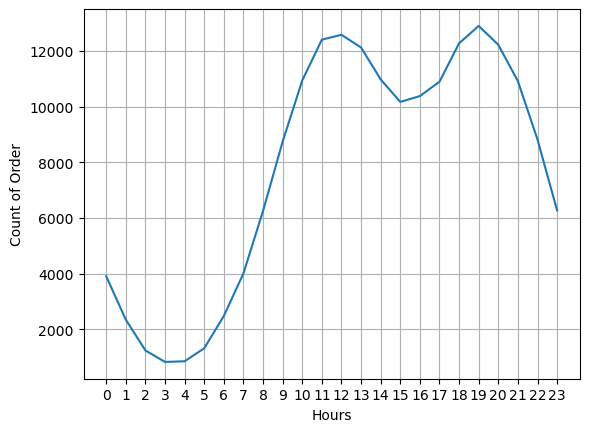

In [16]:
plt.plot("Hour", "Count", data= df_hour)
plt.xticks(df_hour["Hour"])
plt.xlabel("Hours")
plt.ylabel("Count of Order")
plt.grid()
plt.show()

What product sold the most? Why do you think it sold the most?

In [17]:
df_product= df.groupby("Product").sum().sort_values(by= "Quantity Ordered", ascending= False).reset_index()


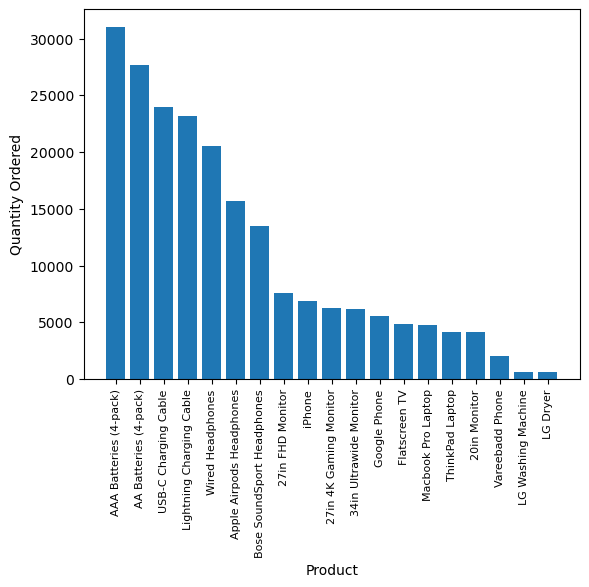

In [18]:
plt.bar("Product","Quantity Ordered", data= df_product)
plt.xticks(df_product["Product"], rotation= 90, size= 8)
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.show()

In [19]:
#Question 4: What products are most often sold together?

#df_items= df.groupby(["Order Date","Purchase Address"])
#df_items.head(3)